## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#Read the data set
#see top 5 rows
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
#shape of the data set
df.shape[0]

294478

There are total 294478 rows

c. The number of unique users in the dataset.

In [5]:
#number of unique users
df.user_id.nunique()

290584

There are 290584 unique users

d. The proportion of users converted.

In [6]:
#mean of converted 
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#here we need to check both the cases i-e when group is not treatment and landing page is new_page and vice-versa
len(df.query('group=="treatment" and landing_page!="new_page"'))+len(df.query('group!="treatment" and landing_page=="new_page"'))

3893

f. Do any of the rows have missing values?

In [8]:
#findinh number of null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No we dont have any missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#we need to clean the data such that if group is treatment or control then landing page is new page or old page respectively 
df2=df[((df['group']=="treatment") & (df["landing_page"]=="new_page")) | ((df['group']=="control") & (df["landing_page"]=="old_page"))]
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#check how many unique users are there in new df2
df2.user_id.nunique()

290584

290584 unique user ids

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#find the repeated user id
df2.user_id[df2.user_id.duplicated()]
#df2.user_id.value_counts()

2893    773192
Name: user_id, dtype: int64

The id is 773192

c. What is the row information for the repeat **user_id**? 

In [13]:
#find the row using masking
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#drop Duplicates
df2=df2.drop_duplicates()

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#find the mean for the converted 
len(df2[df2["converted"]==1])/df2.shape[0]

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#finding the mean for dataset where group is control and converted column is considered
df3=df2.query('group=="control"')
control_g=len(df3[df3["converted"]==1])/df3.shape[0]
control_g

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#finding the mean for dataset where group is treatment and converted column is considered
df4=df2.query('group=="treatment"')
treatment_g=len(df4[df4["converted"]==1])/df4.shape[0]
treatment_g

0.11880724790277405

d. What is the probability that an individual received the new page?

In [18]:
len(df2.query('landing_page=="new_page"'))/df2.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**We can see from above that the probablity of converting if the user is in the group of control is 0.1203863045004612.<br/>Now the probablity of converting when the user is in treatment group is 0.11880724790277405.<br/>We can see that there is not much difference in the probablity so we need to consider other factors also.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** : **$p_{old}$** >= **$p_{new}$**<br/>
**$H_{1}$** : **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
#calculate mean for converted
p_new=df2["converted"].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
#calculate mean for converted
p_old=df2["converted"].mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
#length of the dataset where group is treatment
n_new=len(df2.query('group=="treatment"'))
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
#length of the dataset where group is control
n_old=len(df2.query('group=="control"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#using random.choice we try to simulate the appropriate values for the given probablities of new page
new_page_converted=np.random.choice([0,1],n_new,p=[p_new,1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#using random.choice we try to simulate the appropriate values for the given probablities of old Page
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
#calculate observed difference
a = df2[df2['landing_page'] == 'new_page']
a=a['converted'].mean()
b = df2[df2['landing_page'] == 'old_page']
b = b['converted'].mean()
obs_diff=a-b

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
#create an array with the difference values form the random.choice function for 10000 times 
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   22.,   158.,   718.,  1910.,  2785.,  2592.,  1347.,   399.,
           60.,     9.]),
 array([-0.00431837, -0.0034181 , -0.00251783, -0.00161757, -0.0007173 ,
         0.00018297,  0.00108323,  0.0019835 ,  0.00288376,  0.00378403,
         0.0046843 ]),
 <a list of 10 Patch objects>)

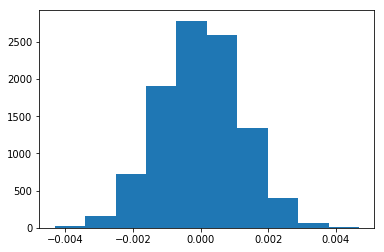

In [27]:
#plot a histogram
plt.hist(p_diffs)

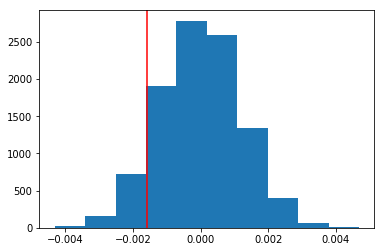

In [28]:
#compare the hist with observed difference
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color="red")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
(p_diffs>obs_diff).mean()

0.90510000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We computed the p value and as for the null hypothesis to be true then the p value should be greater than the type 1 error and it is true so we conclude that null hypothesis is accepted and the new page does not provide significant improvements.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = len(df2.query('converted==1 and landing_page=="old_page"'))
convert_new = len(df2.query('converted==1 and landing_page=="new_page"'))
n_old = len(df2.query('landing_page=="old_page"'))
n_new = len(df2.query('landing_page=="new_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 
z_score, p_value

(1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Here also we can see that both the values shows that we failed to reject the null hypothesis so we accept the null hypothesis .**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#add intercept
df2['intercept'] = 1

#Create dummy variable
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
#Using the logit function fit the regression model to dataset
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
#Observe summary
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-15 07:01 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Here in Logistic Regression**

**$H_{0}$** : $p_{new}$ - $p_{old}$ = 0<br/>

**But in part II <br/>**

**$H_{0}$** : **$p_{old}$** >= **$p_{new}$**<br/>
**$H_{1}$** : **$p_{old}$** < **$p_{new}$**

**So,That's why the p_value is different.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Additional factors should be considered because we may not that they me be related or not just by looking but the disadvantage is that they me be related in a negative way also.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
#read countries.csv file
df_cou=pd.read_csv("countries.csv")
df_cou.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [36]:
#unique values of country column
df_cou.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [37]:
#join two data set with index as user_id
df_new=df2.set_index("user_id").join(df_cou.set_index("user_id"))
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US


In [38]:
df_new[["US","UK","CA"]]=pd.get_dummies(df_new["country"])[["US","UK","CA"]]
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
user_id,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,1,0,0
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,1,0,0
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,1,0,0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,1,0,0
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,1,0,0


In [39]:
#Using intercept concept from multiple regression create columns with dependencies
df_new["US_ab_page"]=df_new["US"]*df_new["ab_page"]
df_new["UK_ab_page"]=df_new["UK"]*df_new["ab_page"]
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,1,0,0,1,0
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,1,0,0,1,0
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,1,0,0,0,0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,1,0,0,1,0
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,1,0,0,1,0


In [40]:
#Using logit function fit the model
log_mod=sm.Logit(df_new["converted"],df_new[["intercept","US","UK","ab_page","US_ab_page","UK_ab_page"]])
result=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
#observe summary
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-15 07:01 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US_ab_page     0.0469    0.0538    0.8716  0.3834  -0.0585   0.1523
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

**As we can see there isnt any significant p values for any feature so we fail to reject the null hypothesis.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [107]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0